In [39]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [40]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [41]:
JOURNALS = "mag/Journals.txt"
JOURNALS_HEADER = [
    "JournalId",
    "Rank",
    "NormalizedName",
    "DisplayName",
    "Issn",
    "Publisher",
    "Webpage",
    "PaperCount",
    "PaperFamilyCount",
    "CitationCount",
    "CreatedDate",
]
PAPERS = "mag/Papers.txt"
PAPERS_HEADER = [
    "PaperId",
    "Rank",
    "Doi",
    "DocType",
    "PaperTitle",
    "OriginalTitle",
    "BookTitle",
    "Year",
    "Date",
    "Publisher",
    "JournalId",
    "ConferenceSeriesId",
    "ConferenceInstanceId",
    "Volumne",
    "Issue",
    "FirstPage",
    "LastPage",
    "ReferenceCount",
    "CitationCount",
    "EstimatedCitation",
    "OriginalVenue",
    "FamilyId",
    "CreatedDate",
]

In [42]:
with open(JOURNALS) as fp:
    journals_df = pd.read_csv(fp, sep="\t", header=None, names=JOURNALS_HEADER)

In [43]:
arXiv_journals = journals_df[journals_df.DisplayName.str.contains("arXiv")]

In [44]:
arXiv_journals.head()

,JournalId,Rank,NormalizedName,DisplayName,Issn,Publisher,Webpage,PaperCount,PaperFamilyCount,CitationCount,CreatedDate
79,2597175965,8628,arxiv computer vision and pattern recognition,arXiv: Computer Vision and Pattern Recognition,NaN,NaN,NaN,24790,254493,2017-03-23,NaN
285,2595899084,11233,arxiv human computer interaction,arXiv: Human-Computer Interaction,NaN,NaN,NaN,2441,4664,2017-03-23,NaN
389,2920963920,11196,arxiv signal processing,arXiv: Signal Processing,NaN,NaN,NaN,3247,1704,2019-03-22,NaN
688,2595243153,11948,arxiv sound,arXiv: Sound,NaN,NaN,NaN,1317,3643,2017-03-23,NaN
689,2595580166,11592,arxiv data analysis statistics and probability,"arXiv: Data Analysis, Statistics and Probability",NaN,NaN,NaN,1400,6414,2017-03-23,NaN


In [45]:
def extract_papers(arXiv_journals, num_loops=-1):
    chunksize = 10 ** 6
    count = 0
    paperCounter = Counter({})
    relevantPapers = pd.DataFrame(columns=PAPERS_HEADER)
    for chunk in pd.read_csv(
        PAPERS,
        chunksize=chunksize,
        sep="\t",
        header=None,
        names=PAPERS_HEADER,
        low_memory=False,
    ):
        count += 1
        print(f"Processing {chunksize * (count - 1)} - {chunksize * count}")
        paperCounter += Counter(
            dict(
                pd.to_numeric(chunk.Year, errors="coerce")
                .astype("Int32")
                .value_counts()
            )
        )
        relevantPapers = relevantPapers.append(
            chunk[chunk.JournalId.isin(list(arXiv_journals.JournalId))],
            ignore_index=True,
        )
        if count == num_loops:
            break
    all_paper_count = (
        pd.DataFrame.from_dict(paperCounter, orient="index")
        .reset_index()
        .rename(columns={"index": "year", 0: "count"})
    )
    all_paper_count.to_csv(r"results/arxiv_all_paper_count.csv")
    relevantPapers.to_csv(r"results/arxiv_papers.csv")

In [46]:
extract_papers(arXiv_journals)

Processing 0 - 1000000
Processing 1000000 - 2000000
Processing 2000000 - 3000000
Processing 3000000 - 4000000
Processing 4000000 - 5000000
Processing 5000000 - 6000000
Processing 6000000 - 7000000
Processing 7000000 - 8000000
Processing 8000000 - 9000000
Processing 9000000 - 10000000
Processing 10000000 - 11000000
Processing 11000000 - 12000000
Processing 12000000 - 13000000
Processing 13000000 - 14000000
Processing 14000000 - 15000000
Processing 15000000 - 16000000
Processing 16000000 - 17000000
Processing 17000000 - 18000000
Processing 18000000 - 19000000
Processing 19000000 - 20000000
Processing 20000000 - 21000000
Processing 21000000 - 22000000
Processing 22000000 - 23000000
Processing 23000000 - 24000000
Processing 24000000 - 25000000
Processing 25000000 - 26000000
Processing 26000000 - 27000000
Processing 27000000 - 28000000
Processing 28000000 - 29000000
Processing 29000000 - 30000000
Processing 30000000 - 31000000
Processing 31000000 - 32000000
Processing 32000000 - 33000000
Pr

In [48]:
arxiv_papers = pd.read_csv(r"results/arxiv_papers.csv", index_col=0)
arxiv_papers.head()

,PaperId,Rank,Doi,DocType,PaperTitle,OriginalTitle,BookTitle,Year,Date,Publisher,...,Volumne,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,EstimatedCitation,OriginalVenue,FamilyId,CreatedDate
0,2953327271,20240,NaN,Repository,the adaptive priority queue with elimination a...,The Adaptive Priority Queue with Elimination a...,NaN,2014.0,2014-08-05,NaN,...,NaN,NaN,NaN,NaN,6.0,0.0,0.0,"arXiv: Distributed, Parallel, and Cluster Comp...",14558443.0,2019-06-27
1,2950265543,20380,NaN,Repository,document retrieval on repetitive collections,Document Retrieval on Repetitive Collections,NaN,2014.0,2014-04-19,NaN,...,NaN,NaN,NaN,NaN,13.0,4.0,4.0,arXiv: Data Structures and Algorithms,15354235.0,2019-06-27
2,2951468795,19497,NaN,Repository,bayesian design of experiments using approxima...,Bayesian Design of Experiments using Approxima...,NaN,2015.0,2015-01-01,NaN,...,NaN,NaN,NaN,NaN,0.0,3.0,4.0,arXiv: Methodology,55534668.0,2019-06-27
3,2950930377,20681,NaN,Repository,an optimal angle of launching a point mass in ...,An Optimal Angle of Launching a Point Mass in ...,NaN,2005.0,2005-06-28,NaN,...,NaN,NaN,NaN,NaN,11.0,3.0,3.0,arXiv: Classical Physics,166884794.0,2019-06-27
4,2949633238,20731,NaN,Repository,computer interaction and the benefits of socia...,Computer Interaction and the Benefits of Socia...,NaN,2013.0,2013-02-22,NaN,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,arXiv: Human-Computer Interaction,206983337.0,2019-06-27


In [49]:
count_dataframe = pd.read_csv(r"results/all_paper_count.csv", index_col=0)
count_dataframe = count_dataframe[count_dataframe.year <= 2018].sort_values(
    by=["year"], ascending=False
)
count_dataframe.head()

,year,count
3,2018,10350499
4,2017,10336160
0,2016,10815189
1,2015,10839423
2,2014,10551159


In [50]:
arxiv_series = arxiv_papers.groupby(["Year"])["PaperId"].count()
arxiv_series = arxiv_series.drop(labels=[2019, 2020])

In [51]:
arxiv_count = arxiv_series.values[24:][::-1]
arxiv_count = list(arxiv_count) + [0] * (len(count_dataframe) - len(arxiv_count))

In [52]:
year = list(count_dataframe["year"])
count = list(count_dataframe["count"])
count = [x - y for (x, y) in zip(count, arxiv_count)]

In [53]:
count[1830 - 1800]

2082049

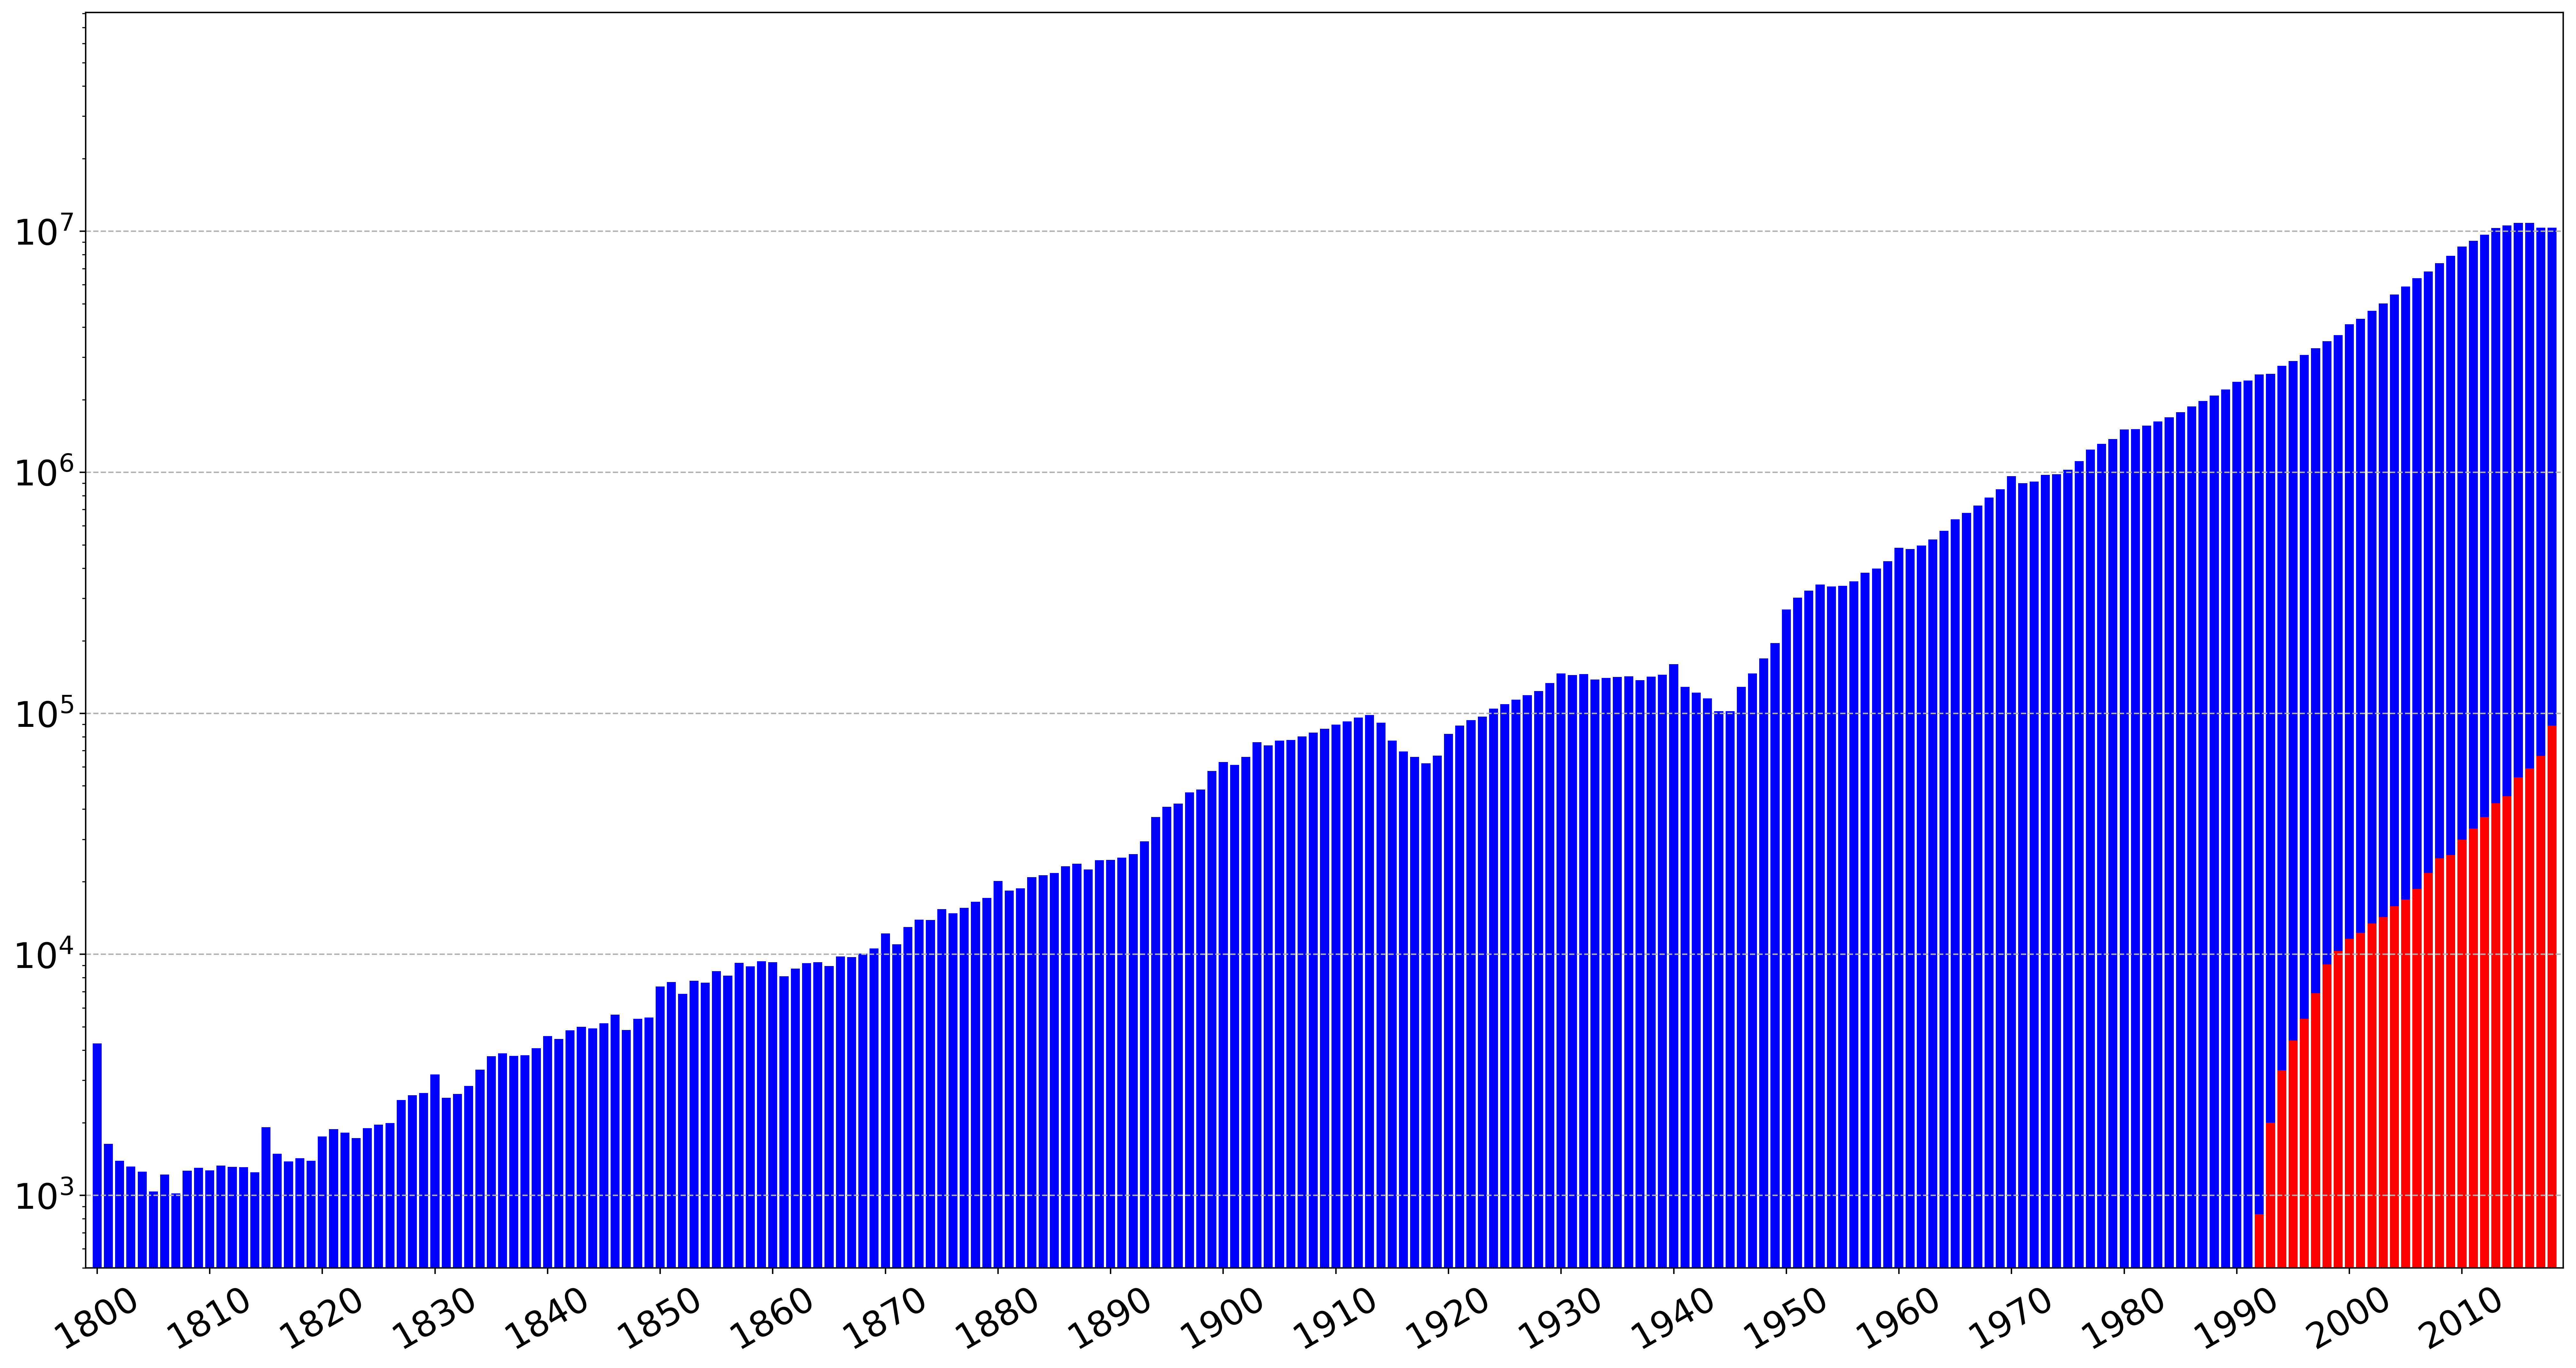

In [55]:
fig, ax = plt.subplots(dpi=400)
ax.set_yscale("log")
plt.xticks(np.arange(min(year), max(year) + 1, 10))

plt.bar(year, arxiv_count, color="red")
plt.bar(year, count, color="blue", bottom=arxiv_count)


ax.yaxis.grid(linestyle="--")
plt.xlim([min(year) - 1, max(year) + 1])
plt.ylim([500, max(count) + 70000000])
ax.tick_params(labelsize=20)
plt.xticks(rotation=30)
fig.set_size_inches(25, 13)


# ax.annotate(
#     "1830s: Review reports become private and anonymous (single blind)",
#     xy=(1830, count[2018 - 1830]),
#     xytext=(1830 - 30, count[2018 - 1830] * 5),
#     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=90"),
#     ha="left",
# )

# ax.annotate(
#     "1960s: Nature introduces peer review",
#     xy=(1960, count[2018 - 1960]),
#     xytext=(1960 - 40, count[2018 - 1960] * 5),
#     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=90"),
#     ha="left",
# )

# ax.annotate(
#     "1970s: Lancet introduces peer review",
#     xy=(1970, count[2018 - 1970]),
#     xytext=(1970 - 40, count[2018 - 1970] * 5),
#     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=90"),
#     ha="left",
# )

# ax.annotate(
#     "1990s: Open Preprint server ArXiv launches",
#     xy=(1990, count[2018 - 1990]),
#     xytext=(1990 - 40, count[2018 - 1990] * 5),
#     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=90"),
#     ha="left",
# )

# ax.annotate(
#     '2000s: The term "open access" is formulated',
#     xy=(2000, count[2018 - 2000]),
#     xytext=(2000 - 40, count[2018 - 2000] * 5),
#     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=90"),
#     ha="left",
# )

# ax.annotate(
#     "2010s: Open review journals (e.g., PeerJ, eLife, F1000Research) lauch",
#     xy=(2010, count[2018 - 2010]),
#     xytext=(2010 - 50, count[2018 - 2010] * 5),
#     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=90"),
#     ha="left",
# )

plt.savefig("test.png", bbox_inches="tight")